In [1]:
import matplotlib.pyplot as plt
import numpy as np

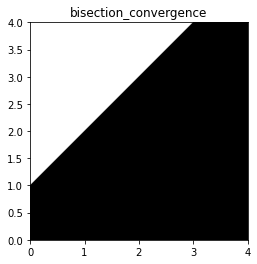

In [2]:
extent = 0.0, 4.0, 0.0, 4.0 
   
width = 400
height= 400
pixels = np.full((width,height,3),0)
for i in range(width):
  for j in range(height):
    if (j>i+100): 
      pixels[height-j-1,i,0] = pixels[height-j-1,i,1] = pixels[height-j-1,i,2] = 255
      #print(i,j)

plt.title('bisection_convergence')
plt.imshow(pixels,extent = extent)
plt.show()

# 1.Modify the BisectionConvergence.ipynb to be applied to f(x) = (x-1) *(x-2) *(x-3)*(x-4) for x in [0.5).

Text(0, 0.5, 'f(x)')

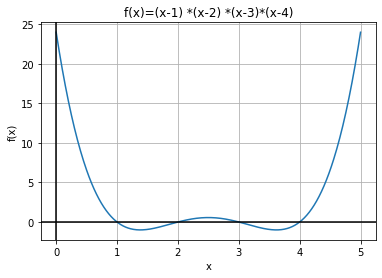

In [3]:
def func(x): 
    return (x-1) *(x-2) *(x-3) *(x-4) 


x = np.linspace(0.0,5.0,500)
fig, ax = plt.subplots()
ax.plot(x,func(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1) *(x-2) *(x-3)*(x-4)')
plt.xlabel('x')
plt.ylabel('f(x)')

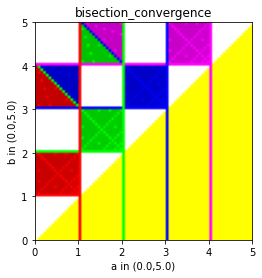

In [9]:
width = height = 80
xi=0.0
xf=5.0
eps = 1e-3
mxiter = 1e4

pixels = np.full((width,height,3),0)
# roots
r1 = 1
r2 = 2
r3 = 3
r4= 4
   
multcol = 5

for i in range(height):
            
            aa =   float(xi + (i * (xf-xi) /height))
            
            for j in range(width):
                bb= float(xi + (j* (xf-xi)/ width))

                a = aa
                b = bb
                c=a
                iter = 0
                
                while ((b-a) >= eps and (func(a) * func(b) <= 0)): 
                   
                    # Check if a is root 
                    if (func(a) == 0.0): 
                      c=a
                      break

                    # Check if b is root 
                    if (func(b) == 0.0): 
                      c=b
                      break
  
                    # Find middle point 
                    c = (a+b)/2
    
                    # Decide the side to repeat the steps 
                    if (func(c)*func(a) < 0): 
                        b = c 
                    else: 
                        a = c 
                    
                    iter = iter + 1
                    
                    if (iter > mxiter):
                     break

                # Pixels colored using the roots
                if abs(c-r1)<eps:
                    # color red
                    pixels[height-j-1,i] = (255 - iter*multcol, 0, 0)
                elif abs(c-r2)<=eps:
                    # color green
                    pixels[height-j-1,i] = (0, 255 - iter*multcol, 0)
                elif abs(c-r3)<=eps:
                    # color blue
                    pixels[height-j-1,i] = (0, 0, 255 - iter*multcol)
                elif abs(c-r4)<=eps:
                    # color purple 
                    pixels[height-j-1,i] = (255 - iter*multcol, 0, 255 - iter*multcol)
                elif (b < a):
                    pixels[height-j-1,i] = (255, 255, 0)
                elif (func(a) * func(b) >= 0):
                    pixels[height-j-1,i] = (255, 255, 255)
                else:   
                    pixels[height-j-1,i] = (0, 0, 0)

                
     
plt.title('bisection_convergence')
plt.xlabel("a in ("+str(xi)+","+str(xf)+")")
plt.ylabel("b in ("+str(xi)+","+str(xf)+")")
extent = xi, xf, xi, xf
plt.imshow(pixels,extent =extent)
plt.show()

# 2.Describe the regions where starting intervals (a,b) converge and to which root does it converge. Also which regions do not converge and why.

En la imagen resultante se identifica el eje vertical por los valores que toma b y el eje horizontal los valores que toma a. Estos valores van de 0 a 5 para determinar el intervalo (a,b) en cada punto del gráfico, que se colorea según su convergencia. Esta convergencia se dá por el método de la bisección, que consiste en dividir el intervalo tomado hasta que resulte en un punto que es una raiz.

Primero se determina el color amarillo donde, a será mayor que b , y esos intervalos no se toman para converger a una raiz, a excepción donde a= a alguna raiz, donde la raiz a la que converge es = a.

Luego definimos a que raiz converge  de cada par de a y b para los intervalos (a,b)
* El color rojo signifca que al tomar ese intervalo , converge a la raiz r1= 1
*El color verde signifca que al tomar ese intervalo , converge a la raiz r2= 2
*El color azul signifca que al tomar ese intervalo , converge a la raiz r3= 3
*El color purpura signifca que al tomar ese intervalo , converge a la raiz r4= 4

Y la región en blanco la definimos como la región donde, al tomar esos valores a y b, el intervalo no tendria convergencia.

Esto se da ya que para encontrar la raiz, se busca que la función en cada extremo del intervalo sea de diferente signo, o que alguno sea igual a 0 (que significaria que un extremo se encuentra en una raiz) , es decir:

f(a)<0  y f(b)>0

o

f(a)>0 y f(b)<0

o 

f(a)=0

o

f(b)=0

Si no se cumple alguna de estas, no se puede hallar una raiz por este metodo en ese intervalo.